# Problem set 1

In [2]:
import numpy as np


### 1) What is the mean and standard deviation of the numbers from -5 to 50 incremented by 3?

In [65]:
# 1)
a = list(range(-5,50,3))
print(np.mean(a))
print(np.std(a))

22.0
16.431676725154983


### 2) What is the sum of the numbers from 1 to 10 (by 1) each multiplied by the square root of the numbers from 1 to 10?

In [11]:
# 2)
b = np.arange(1, 11)
print(b)
sq = np.sqrt(b)
print(sq)
mul = b*sq
print(mul)
Sum = np.sum(mul)
print(Sum)

[ 1  2  3  4  5  6  7  8  9 10]
[1.         1.41421356 1.73205081 2.         2.23606798 2.44948974
 2.64575131 2.82842712 3.         3.16227766]
[ 1.          2.82842712  5.19615242  8.         11.18033989 14.69693846
 18.52025918 22.627417   27.         31.6227766 ]
142.6723106687563


### 3) What is the sum of all the powers of i for i in the range of 1 to 10? (Hint: The best possible solution for this is to use np.power(3,x) where x is a vector or list of numbers. This function will raise 3 to all the powers. You can also use 3.x where again x is a range of values, but for  x needs to be generated by np.arange.)

In [63]:
# 3)
c = list(range(1,11))
np.power(3,c)

array([    3,     9,    27,    81,   243,   729,  2187,  6561, 19683,
       59049])

### 4) Find the mean of a set of 50 uniform random variables distributed between 2 and 4? Run this twice. Is your answer the same, or different? Why?

In [66]:
# 4)
d=np.random.uniform(2, 4, 50)
print(sum(d))

150.0540021188516


### 5)The function np.mod(a,b) in the numpy library is the modulo of a with respect to b. This is the remainder of a when divided by b.


#### a. Using a loop print all the numbers between 1 and 100 which are evenly divisable by 5.

In [18]:
for e in np.array(range(1,101)):
 if np.mod(e,5) == 0:
    print(e)


5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100


#### b. Now repeat the same procedure, but without a for loop.

In [14]:
for e in np.array(range(1,101)):
 if np.mod(e,5) == 0:
    print(e)


array([1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2,
       3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4,
       0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3,
       4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0])

### 6) You know the earnings for three stocks, MSFT = 100, AAPL=50, IBM=25. Write Python code which puts these in a dictionary, with the ticker symbols as the key. Add a line of Python which would add GOOG=200. Could you also add a numpy array of earnings for GOOG as in [1.2, 4.4, 6.], if so write the Python code to do this.

In [21]:
stocks = {
    'MSFT': 100, 
    'AAPL': 50, 
    'IBM': 25
}
stocks['GOOG'] = np.array([1.2, 4.4, 6.])
print(stocks['GOOG'])
print(stocks)


[1.2 4.4 6. ]
{'MSFT': 100, 'AAPL': 50, 'IBM': 25, 'GOOG': array([1.2, 4.4, 6. ])}


### 7) Now begin using Scikit-learn. Write a short Python program to generate some simulated classification data. First generate a vector of length nmc of uniform

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# These lines of code generate a feature and a class randomly with a monte-carlo
# The features are uniform(0,1)
# Class is a (0,1) integer where prob(1) = X[i]
nmc = 100
# X needs to be a matrix with nmc rows, and 1 column
X = np.random.uniform(size=(nmc,1))
Y = np.zeros(nmc,dtype=int)+( np.random.uniform(size=nmc)<X)
# This is the code for splitting into test/train sets, note test_size argument
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.5)

#### 1. Write a k nearest neighbor predictor for your data, using k=3. Report the accuracy both for the training and testing sample.

In [122]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
print(clf)
clf.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [123]:
print("Test set accuracyfor train: {:.2f}".format(clf.score(X_train, Y_train)))
print("Test set accuracy for test: {:.2f}".format(clf.score(X_test, Y_test)))

Test set accuracyfor train: 0.76
Test set accuracy for test: 0.28


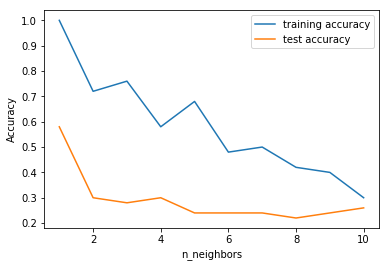

#### 2. Now repeat the figure we tried in class which showed forecast accuracy in training and testing sets as k varies. Plot the accuracy for nearest neighbor predictors across the range of 1 to 50. Do this for both the training and testing data as we did in class.

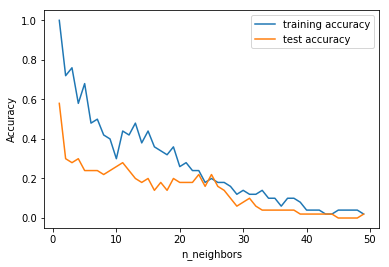

In [125]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 50
neighbors_settings = range(1, 50)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, Y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, Y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, Y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()